In [18]:
import configparser
from argparse import Namespace
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

import librosa
from datasets.primates_librosa_datamodule import PrimatesLibrosaDatamodule
from librosa import display

In [19]:
# variables
data_option = 'devel'

In [23]:
from ml_lib.utils.tools import auto_cast
with (Path('..') / '_parameters.ini') as f:
    print(f' file exists:{f.exists()}')
    # Load Defaults from _parameters.ini file
    config = configparser.ConfigParser()
    config.read(str(f))

    hparams = dict()
    for key in ['project', 'train', 'data']:
        defaults = config[key]
        hparams.update({key: auto_cast(val) for key, val in defaults.items()})
    hparams.update(data_root='../data',
                   target_mel_length_in_seconds=1,
                   random_apply_chance = 0.7,
                   loudness_ratio = 0.0,
                   shift_ratio = 0.3,
                   noise_ratio = 0.0,
                   mask_ratio = 0.3,
                   )
hparams = Namespace(**hparams)

dataset = PrimatesLibrosaDatamodule.from_argparse_args(hparams)
dataset.prepare_data(subsets=[data_option])
data_set_option = dataset.datasets[data_option]

 file exists:True
test skipped...
train skipped...
devel-dataset set up!
Dataset CompareBase setup done.


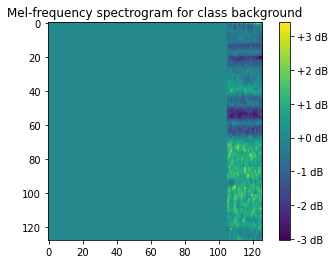

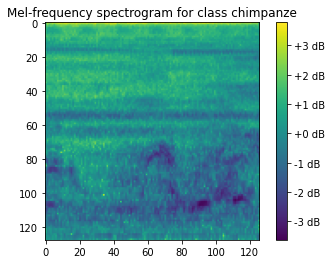

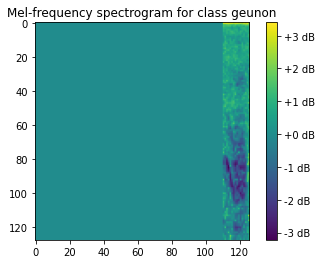

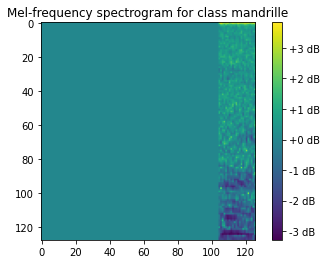

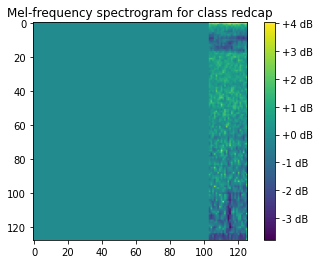

In [24]:
for idx in range(dataset.n_classes):
    label = -1
    sample_idx = 20
    mel_tensor = None

    while label != idx:
        filepath, mel_tensor, label = data_set_option[sample_idx]
        sample_idx += 1

    fig, ax = plt.subplots()
    img = plt.imshow(mel_tensor.squeeze())
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    class_names = {val: key for key, val in dataset.class_names.items()}
    ax.set(title=f'Mel-frequency spectrogram for class {class_names[idx]}')
    plt.show()

sr= 16000


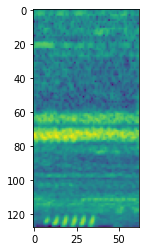

In [22]:
wave_path = Path('..') / 'data' / 'primates' / 'wav' / 'devel_00011.wav'
wav_file, sr =  librosa.load(wave_path, sr=16000)
print(f'sr= {sr}')
mel = librosa.feature.melspectrogram(wav_file, sr=16000, n_mels=128, hop_length=128, n_fft=512)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(mel, ref=np.max)
img = plt.imshow(S_dB)